<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/RandomForest/35_RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/15-gym_crowdedness.csv')

In [50]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [51]:
df.shape

(62184, 11)

In [52]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [54]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [55]:
df['date']=pd.to_datetime(df['date'],utc=True)

In [56]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   number_people         62184 non-null  int64              
 1   date                  62184 non-null  datetime64[ns, UTC]
 2   timestamp             62184 non-null  int64              
 3   day_of_week           62184 non-null  int64              
 4   is_weekend            62184 non-null  int64              
 5   is_holiday            62184 non-null  int64              
 6   temperature           62184 non-null  float64            
 7   is_start_of_semester  62184 non-null  int64              
 8   is_during_semester    62184 non-null  int64              
 9   month                 62184 non-null  int64              
 10  hour                  62184 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(9)
memory usage: 5.2 M

In [58]:
df['date']

,date
0,2015-08-15 00:00:11+00:00
1,2015-08-15 00:20:14+00:00
2,2015-08-15 00:30:15+00:00
3,2015-08-15 00:40:16+00:00
4,2015-08-15 00:50:17+00:00
...,...
62179,2017-03-19 01:42:28+00:00
62180,2017-03-19 01:52:35+00:00
62181,2017-03-19 02:02:40+00:00
62182,2017-03-19 02:12:47+00:00


In [59]:
df['date'].dt.year

,date
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
62179,2017
62180,2017
62181,2017
62182,2017


In [60]:
df['year'] = df['date'].dt.year

In [61]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17,2015


In [62]:
df['year'].unique()

array([2015, 2016, 2017], dtype=int32)

In [63]:
df.drop('date',axis=1,inplace=True)

In [64]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,61211,4,0,0,71.76,0,0,8,17,2015
1,45,62414,4,0,0,71.76,0,0,8,17,2015
2,40,63015,4,0,0,71.76,0,0,8,17,2015
3,44,63616,4,0,0,71.76,0,0,8,17,2015
4,45,64217,4,0,0,71.76,0,0,8,17,2015


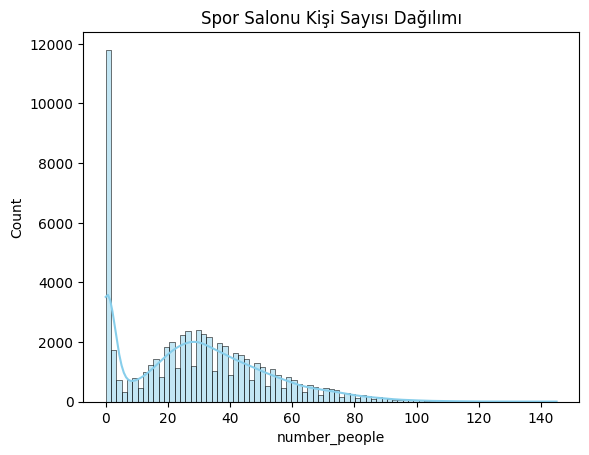

In [65]:
sns.histplot(df['number_people'], kde=True, color='skyblue')
plt.title('Spor Salonu Kişi Sayısı Dağılımı')
plt.show()

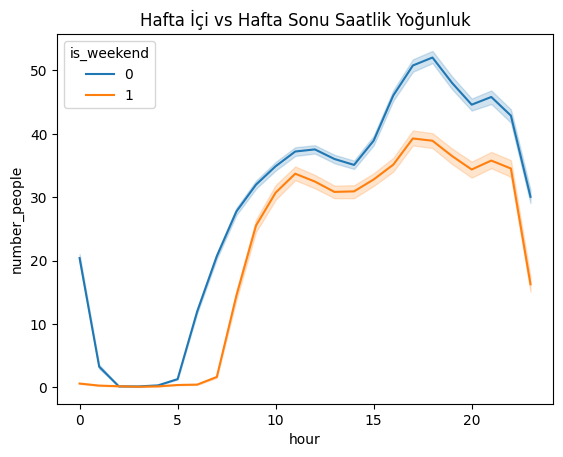

In [66]:
# Saatlik ortalama yoğunluk
sns.lineplot(data=df, x='hour', y='number_people', hue='is_weekend')
plt.title('Hafta İçi vs Hafta Sonu Saatlik Yoğunluk')
plt.show()

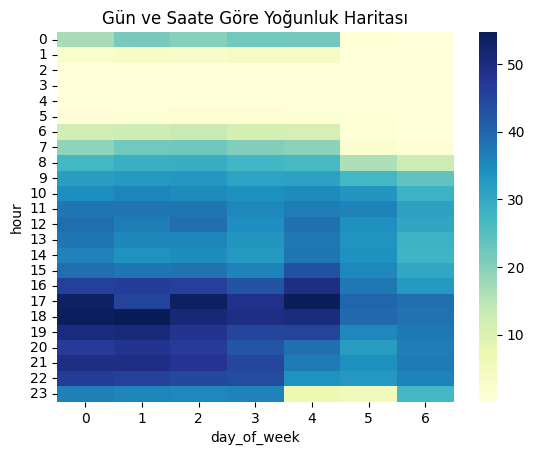

In [67]:
pivot_df = df.pivot_table(values='number_people', index='hour', columns='day_of_week', aggfunc='mean')
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Gün ve Saate Göre Yoğunluk Haritası')
plt.show()

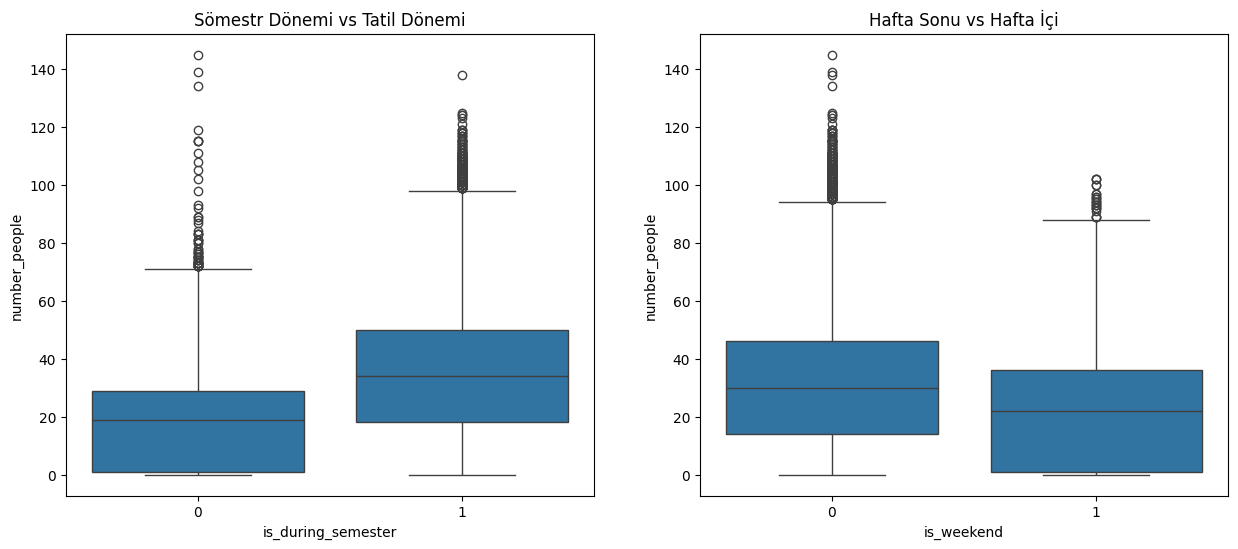

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(ax=axes[0], data=df, x='is_during_semester', y='number_people')
axes[0].set_title('Sömestr Dönemi vs Tatil Dönemi')

sns.boxplot(ax=axes[1], data=df, x='is_weekend', y='number_people')
axes[1].set_title('Hafta Sonu vs Hafta İçi')
plt.show()

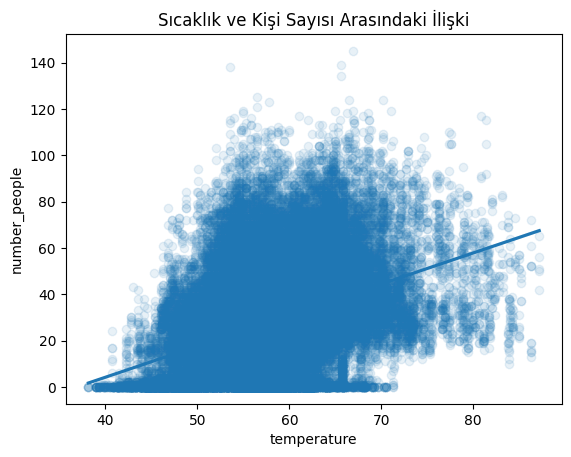

In [69]:
sns.regplot(data=df, x='temperature', y='number_people', scatter_kws={'alpha':0.1})
plt.title('Sıcaklık ve Kişi Sayısı Arasındaki İlişki')
plt.show()

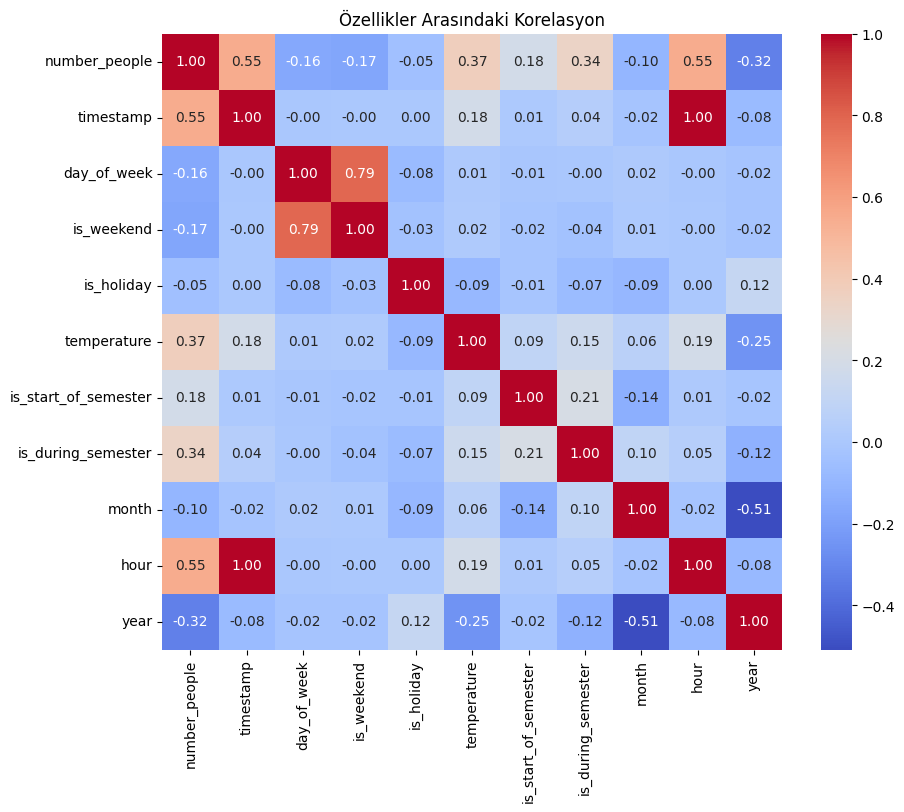

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Özellikler Arasındaki Korelasyon')
plt.show()

In [71]:
df.drop('timestamp',axis=1,inplace=True)

In [72]:
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,4,0,0,71.76,0,0,8,17,2015
1,45,4,0,0,71.76,0,0,8,17,2015
2,40,4,0,0,71.76,0,0,8,17,2015
3,44,4,0,0,71.76,0,0,8,17,2015
4,45,4,0,0,71.76,0,0,8,17,2015


In [73]:
# dependent & independent feature
X = df.drop('number_people',axis=1)
y = df['number_people']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [80]:
def calculate_model_metrics(true,predicted):
  mae = mean_absolute_error(true,predicted)
  mse = mean_squared_error(true,predicted)
  score = r2_score(true,predicted)
  rmse = np.sqrt(mean_squared_error(true,predicted))
  return mae,rmse,score

In [81]:
models = {

   "Linear Regression" : LinearRegression(),
   "Lasso" : Lasso(),
   "Ridge" : Ridge(),
   "K-Neighbors Regressor" : KNeighborsRegressor(),
   "Decision Tree Regressor" : DecisionTreeRegressor(),
   "Random Forest Regressor" : RandomForestRegressor()
}

In [82]:
len(list(models))

6

In [83]:
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)       # train accuracy yüksek test accuracy düşükse overfitting olabilir bu yüzden X train predlerini alıyoruz arada çok fark varsa r2 score lar arası overfitting vardır.
  y_test_pred = model.predict(X_test)

  model_train_mae,model_train_rmse,model_train_r2=calculate_model_metrics(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_r2=calculate_model_metrics(y_test,y_test_pred)

  print(list(models.values())[i])

  print("Evaluation for Training Set")
  print("RMSE : ",model_train_rmse)
  print("Mean Absolute Error : ",model_train_mae)
  print("R2 SCORE : ",model_train_r2)

  print("------------------------------------")


  print("Evaluation for Test Set")
  print("RMSE : ",model_test_rmse)
  print("Mean Absolute Error : ",model_test_mae)
  print("R2 SCORE : ",model_test_r2)

  print("--------------------------------------")
  print("\n")

LinearRegression()
Evaluation for Training Set
RMSE :  14.322500408269727
Mean Absolute Error :  10.733469936454322
R2 SCORE :  0.5999639521710998
------------------------------------
Evaluation for Test Set
RMSE :  14.45063290337055
Mean Absolute Error :  10.779752371029558
R2 SCORE :  0.5989271376662775
--------------------------------------


Lasso()
Evaluation for Training Set
RMSE :  14.569122351126817
Mean Absolute Error :  10.945189874221992
R2 SCORE :  0.5860687429058037
------------------------------------
Evaluation for Test Set
RMSE :  14.703511215751082
Mean Absolute Error :  10.970594902476911
R2 SCORE :  0.5847671974050243
--------------------------------------


Ridge()
Evaluation for Training Set
RMSE :  14.322500413912243
Mean Absolute Error :  10.733479178820698
R2 SCORE :  0.5999639518559021
------------------------------------
Evaluation for Test Set
RMSE :  14.450633329986024
Mean Absolute Error :  10.779759559023008
R2 SCORE :  0.5989271139851151
-----------------

In [84]:
# hyperparameter-tuning

In [89]:
knn_params = {"n_neighbors" : [2,3,10,20,40,50]}
rf_params = {
          "max_depth" : [5,8,10,15,None],
          "max_features" : ["sqrt","log2",5,7,10],
          "min_samples_split" : [2,8,12,15,20],
          "n_estimators" : [100,200,500,1000]

 }

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
randomcv_models = [
    ("KNN",KNeighborsRegressor(),knn_params),
     ("RF",RandomForestRegressor(),rf_params)
    ]

In [92]:
for name,model,params in randomcv_models:
  randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,n_jobs=-1)
  randomcv.fit(X_train,y_train)
  print("best params for : ",name, randomcv.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params for :  KNN {'n_neighbors': 2}


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


best params for :  RF {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [94]:
models = {
   "K-Neighbors Regressor" : KNeighborsRegressor(n_neighbors=2),
   "Random Forest Regressor" : RandomForestRegressor(n_estimators=1000,min_samples_split=2,max_features=7,max_depth=None)
}

In [95]:
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)       # train accuracy yüksek test accuracy düşükse overfitting olabilir bu yüzden X train predlerini alıyoruz arada çok fark varsa r2 score lar arası overfitting vardır.
  y_test_pred = model.predict(X_test)

  model_train_mae,model_train_rmse,model_train_r2=calculate_model_metrics(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_r2=calculate_model_metrics(y_test,y_test_pred)

  print(list(models.values())[i])

  print("Evaluation for Training Set")
  print("RMSE : ",model_train_rmse)
  print("Mean Absolute Error : ",model_train_mae)
  print("R2 SCORE : ",model_train_r2)

  print("------------------------------------")


  print("Evaluation for Test Set")
  print("RMSE : ",model_test_rmse)
  print("Mean Absolute Error : ",model_test_mae)
  print("R2 SCORE : ",model_test_r2)

  print("--------------------------------------")
  print("\n")

KNeighborsRegressor(n_neighbors=2)
Evaluation for Training Set
RMSE :  5.454986474685179
Mean Absolute Error :  3.5539152622325143
R2 SCORE :  0.9419705041334293
------------------------------------
Evaluation for Test Set
RMSE :  6.906627163661049
Mean Absolute Error :  4.635983532741541
R2 SCORE :  0.9083818400811778
--------------------------------------


RandomForestRegressor(max_features=7, n_estimators=1000)
Evaluation for Training Set
RMSE :  4.709541541495696
Mean Absolute Error :  3.196516515417891
R2 SCORE :  0.9567467539792304
------------------------------------
Evaluation for Test Set
RMSE :  6.421236759341659
Mean Absolute Error :  4.292312826728613
R2 SCORE :  0.9208069796785969
--------------------------------------


